<a href="https://colab.research.google.com/github/ParthG60/Modelling-Political-Polarization/blob/main/Skewed_version_of_Final_Polarization_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class AffectiveVoter:
    """
    Represents an agent with a political affiliation (party ID) and an elite status.
    The agent's position on a spectrum is initialized based on their affiliation.
    """

    def __init__(self, party_id, elite_status, partisan_status):
        self.party_id = party_id
        self.elite = elite_status
        self.partisan = partisan_status
        self.counter = 0

        # Correctly placed initialization inside __init__
        if party_id.lower() == 'd' and elite_status:
            alpha, beta = 2.5, 6.5  # More skewed towards the lower end
            self.position = np.random.beta(alpha, beta)
        elif party_id.lower() == 'd':
            alpha, beta = 2.7, 7.0  # More skewed, tighter variance
            self.position = np.random.beta(alpha, beta)
        elif party_id.lower() == 'r' and elite_status:
            alpha, beta = 6.5, 4.5  # More skewed towards the lower end
            self.position = np.random.beta(alpha, beta)
        elif party_id.lower() == 'r':
            alpha, beta = 6.8, 4.8  # More skewed, tighter variance
            self.position = np.random.beta(alpha, beta)
        elif party_id.lower() == 'i':
            alpha, beta = 4.5, 6.0  # More skewed towards the lower end
            self.position = np.random.beta(alpha, beta)

    def update_position(self, new_position):
        """
        Updates the agent's position. The method name is changed to avoid conflict.
        """
        self.position = new_position

    def is_elite(self):
        """
        Returns the elite status of the agent.
        """
        return self.elite

    def is_partisan(self):
        """
        Returns the partisan status of the agent.
        """
        return self.partisan

    def get_party_id(self):
        """
        Returns the party ID of the agent. Method name changed to avoid conflict.
        """
        return self.party_id

    def interact(self, change_in_position):
        """
        Adjusts the agent's position based on interaction outcomes.
        Ensures the new position remains within the [0, 1] bounds.
        """
        self.position = np.clip(self.position + change_in_position, 0, 1)

    def increase_counter(self):
        """
        Increases the counter by 1.
        """
        self.counter += 1


In [ ]:


import matplotlib.pyplot as plt
import numpy as np

def sensitivity_plot(param_list, opinion_values, polarization, param_name):
    # Create figure for the polarization plot
    plt.figure(figsize=(10, 6))

    # Only one loop to handle both histograms and polarization plots
    for i in range(len(param_list)):
        # Plotting the histogram for opinion values in individual figures to avoid overlap
        plt.figure(figsize=(10, 6))
        positions = [j.position.item() for j in opinion_values[i]]  # Adjusted for the correct extraction of opinion values
        plt.hist(positions, bins=25, alpha=0.75)
        plt.xlabel('Opinion')
        plt.ylabel('Agents')
        plt.title(f'Final Distribution of Opinions for {param_name} = {param_list[i]}')
        plt.grid(True)
        plt.show()

    # Re-select the polarization plot figure to add all polarization lines
    plt.figure(figsize=(10, 6))
    for i in range(len(param_list)):
        plt.plot(polarization[i], label=f'{param_name} = {param_list[i]}')

    plt.xlabel('Simulation number')
    plt.ylabel('Polarization (sd of opinions)')
    plt.title('Polarization over simulation')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage remains the same as before

In [ ]:
def run_simulation_elites_modified(N, E, T, R, gini, sample, sim_num, impact_multiplier, prob_multiplier):
    """
    Simulates interactions among agents with consideration for elite status,
    modifying interaction probability and impact based on elite and non-elite dynamics.

    Parameters:
    - N: Number of agents.
    - E: Elasticity parameter, affects base probability of interaction.
    - T: Threshold parameter, affects interaction based on distance in positions.
    - gini: Is the gini coefficient
    - R: Rate of change parameter, determines base position change after interaction.
    - sample: List of agent instances.
    - sim_num: Number of simulation iterations.
    - impact_multiplier: Multiplies impact of interactions involving elites.
    - prob_multiplier: Adjusts interaction probability for elite to non-elite interactions.

    Returns:
    - Updated list of agents after simulation.
    - Polarization measure over simulation iterations.
    """
    polarization = []  # Track polarization over time
    for t in range(sim_num):
        # Calculate and record standard deviation of positions as polarization measure
        sd_sample = np.std([i.position.item() for i in sample])
        polarization.append(sd_sample)

        for i in range(N):
            j = randint(N)  # Select a random agent for interaction
            if j != i:
                d = (sample[i].position - sample[j].position).item()  # Distance between positions
                Tolerance = T*1/gini

                if sample[i].is_elite == sample[j].is_elite:  # Both agents have the same elite status
                    p = 0.5 ** (abs(d) / E)  # Base probability of interaction
                    change_in_position = abs(d)*R  # Base change in positiion

                    if (sample[i].is_partisan == sample[j].is_partisan) and rand() < p and sample[i].is_partisan: #checks that both are same party and partisan

                        if (sample[i].party_id == sample[j].party_id): # regular positive influence
                            if d >= 0 :
                                sample[i].interact(-change_in_position)
                                sample[j].interact(+change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                            else :
                                sample[i].interact(change_in_position)
                                sample[j].interact(-change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                        elif (sample[i].party_id != sample[j].party_id) and abs(d) < Tolerance : # weak positive influence
                            if d >= 0 :
                                sample[i].interact(-change_in_position/impact_multiplier)
                                sample[j].interact(+change_in_position/impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                            else :
                                sample[i].interact(change_in_position/impact_multiplier)
                                sample[j].interact(-change_in_position/impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                        elif (sample[i].party_id != sample[j].party_id) and abs(d) >= Tolerance : #regular negative influence
                            if d >= 0 :
                                sample[i].interact(+change_in_position)
                                sample[j].interact(-change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                            else :
                                sample[i].interact(-change_in_position)
                                sample[j].interact(+change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                    elif sample[i].is_partisan == sample[j].is_partisan and (rand() < p) : #here we are looking at independants on non partisans essentially

                          if abs(d) < Tolerance: #regular positive influence
                              if d >= 0 :
                                sample[i].interact(-change_in_position)
                                sample[j].interact(+change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                              else :
                                sample[i].interact(change_in_position)
                                sample[j].interact(-change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                          if abs(d) >= Tolerance: #weak negative influence
                              if d >= 0 :
                                sample[i].interact(-change_in_position/impact_multiplier)
                                sample[j].interact(+change_in_position/impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                              else :
                                sample[i].interact(change_in_position/impact_multiplier)
                                sample[j].interact(-change_in_position/impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                else: #When elite status is not the same, probability also changes in this situation
                   change_in_position = abs(d)*R  # Base change in positiion
                   p = 0.5 ** (abs(d) / (E*prob_multiplier))

                   if (sample[i].is_partisan == sample[j].is_partisan) and sample[i].is_partisan and rand() < p: #checks that both are same party and partisan

                        if (sample[i].party_id == sample[j].party_id): # strong positive influence only for mass in this situation
                            if d >= 0 :
                              if sample[i].is_elite:
                                sample[j].interact(+change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(-change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                            else :
                              if sample[i].is_elite:
                                sample[j].interact(-change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(+change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                        if (sample[i].party_id != sample[j].party_id) and abs(d) < Tolerance: # regular positive influence only for mass in this situation
                            if d >= 0 :
                              if sample[i].is_elite:
                                sample[j].interact(+change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(-change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                            else :
                              if sample[i].is_elite:
                                sample[j].interact(-change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(+change_in_position)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                        elif (sample[i].party_id != sample[j].party_id) and abs(d) >= Tolerance: # strong negative influence only for mass in this situation
                            if d >= 0 :
                              if sample[i].is_elite:
                                sample[j].interact(-change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(+change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                            else :
                              if sample[i].is_elite:
                                sample[j].interact(+change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()
                              else:
                                sample[i].interact(-change_in_position*impact_multiplier)
                                sample[i].increase_counter()
                                sample[j].increase_counter()

                   else:
                    if (sample[i].is_partisan and rand() < p): #looping agent is partisan
                      if sample[i].is_elite:
                        if abs(d) < Tolerance: # regular positive influence
                          if d >= 0 :
                            sample[j].interact(+change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                          else:
                            sample[j].interact(-change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                        if abs(d) >= Tolerance: # regular negative influence
                          if d >= 0 :
                            sample[j].interact(-change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                          else:
                            sample[j].interact(+change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                      else:
                        if abs(d) < Tolerance:
                          if d >= 0 :
                            sample[i].interact(-change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                          else:
                            sample[i].interact(+change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                        if abs(d) >= Tolerance:
                          if d >= 0 :
                            sample[j].interact(+change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()
                          else:
                            sample[j].interact(-change_in_position)
                            sample[i].increase_counter()
                            sample[j].increase_counter()

    return sample, polarization


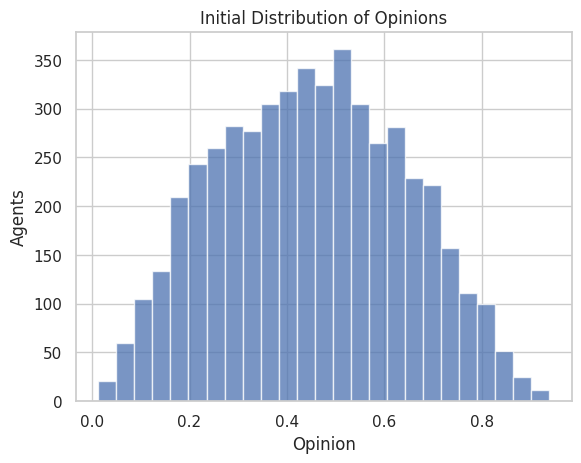

In [ ]:
N = 5000  # Total population
elite = int(N * 0.005)  # 1% of population as elite

prop_per_party = 0.331  # Proportion of each party in total population, based on ANES partisan survey

# Calculating the number of elites per party
democratic_elite = int(elite * prop_per_party)
republic_elite = democratic_elite
ind_elite = elite - democratic_elite - republic_elite

# Calculating non-elite members per party
democractic_non_elite = int((N - elite) * prop_per_party)
republic_non_elite = democractic_non_elite
independant_non_elite = int(N - elite - democractic_non_elite - republic_non_elite)

# Generating samples for non-elite members
democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

# Extracting initial positions for plotting
initial_positions = [j.position.item() for j in full_inequality_sample]

# Plotting the histogram of initial opinion values
plt.hist(initial_positions, bins=25, alpha=0.75)

# Setting plot labels and title
plt.xlabel('Opinion')
plt.ylabel('Agents')
plt.title('Initial Distribution of Opinions')

# Display plot with grid
plt.grid(True)
plt.show()


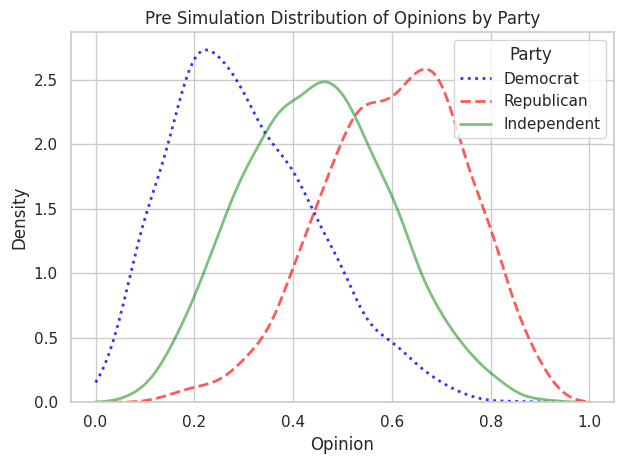

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming democrat_initial_positions, republic_initial_positions, and independant_initial_positions are defined as per your code.


democrat_initial_positions = [j.position.item() for j in full_inequality_sample if j.party_id == 'd']
republic_initial_positions = [j.position.item() for j in full_inequality_sample if j.party_id == 'r']
independant_initial_positions = [j.position.item() for j in full_inequality_sample if j.party_id == 'i']



# Assuming democrat_initial_positions, republic_initial_positions, and independant_initial_positions are defined as per your code.

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")



sns.kdeplot(democrat_initial_positions, color='blue', label='Democrat', linestyle=':', linewidth=2, alpha=0.8, clip=(0, 1))
sns.kdeplot(republic_initial_positions, color='red', label='Republican', linestyle='--', linewidth=2, alpha=0.65, clip=(0, 1))
sns.kdeplot(independant_initial_positions, color='green', label='Independent', linestyle='-', linewidth=2, alpha=0.5, clip=(0, 1))


# Enhance plot readability and aesthetics
plt.legend(title='Party')
plt.xlabel('Opinion')
plt.ylabel('Density')
plt.title('Pre Simulation Distribution of Opinions by Party')
plt.tight_layout()  # Optimizes the layout
plt.show()


In [ ]:

E = 0.1
T = 0.1
R = 0.25
Gini_coefficient = 0.434
intial_sample = full_inequality_sample
impact_multiplier = 1.2
prob_multiplier = 1.2

sim_nums = [100,200,500,1000,2000]

post_interaction_samples = []
polarizations = []

for sim_num in sim_nums:

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, R, Gini_coefficient, full_inequality_sample, sim_num, impact_multiplier, prob_multiplier)
  post_interaction_samples.append(post_interaction_sample)
  polarizations.append(polarization)



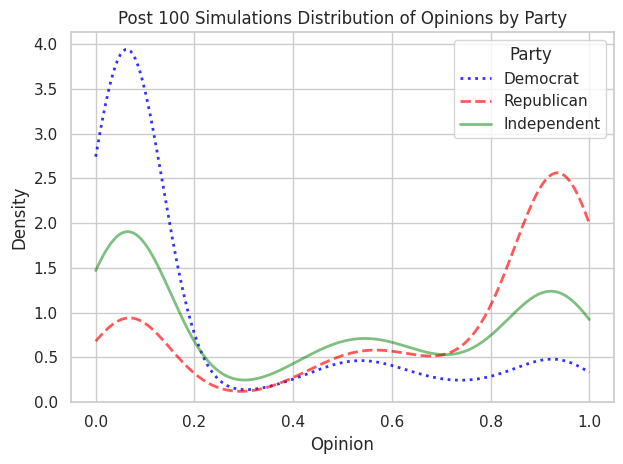

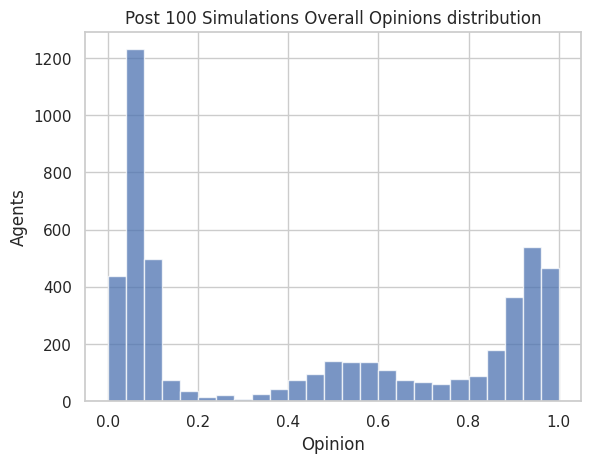

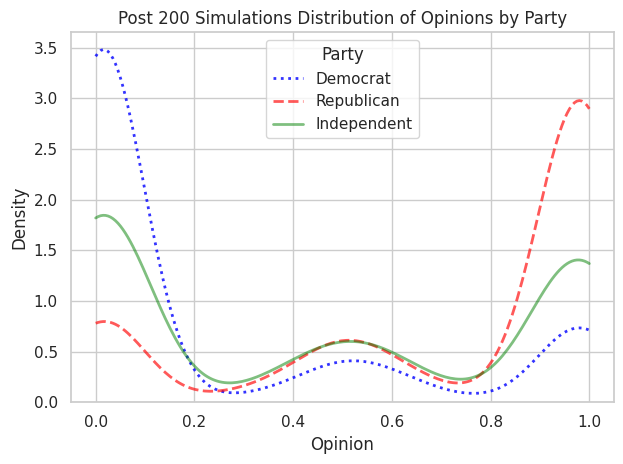

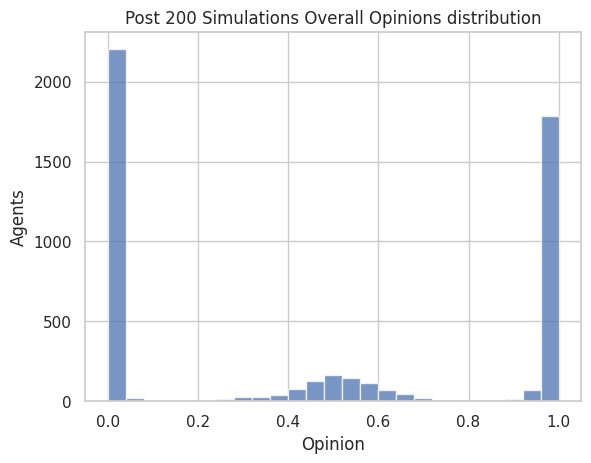

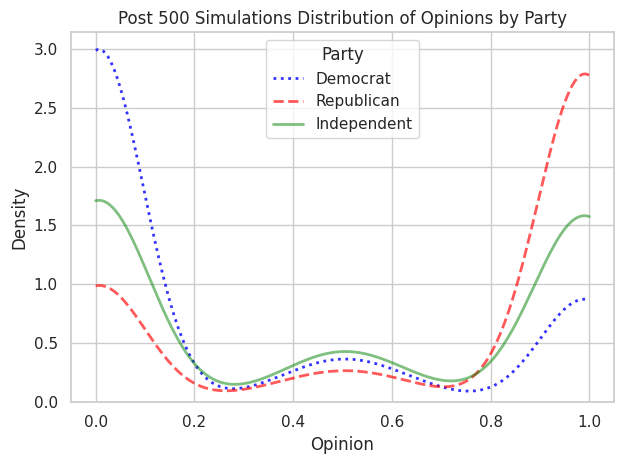

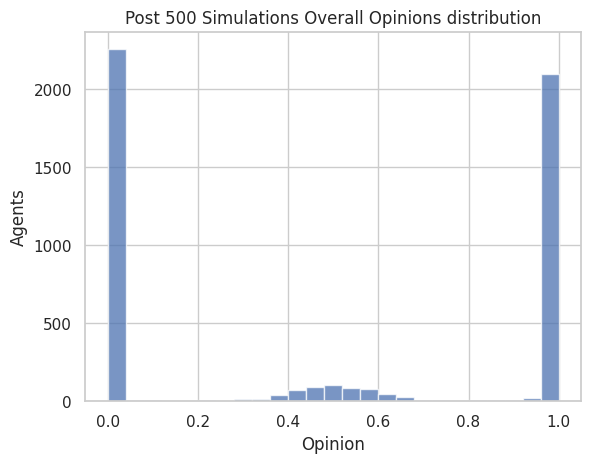

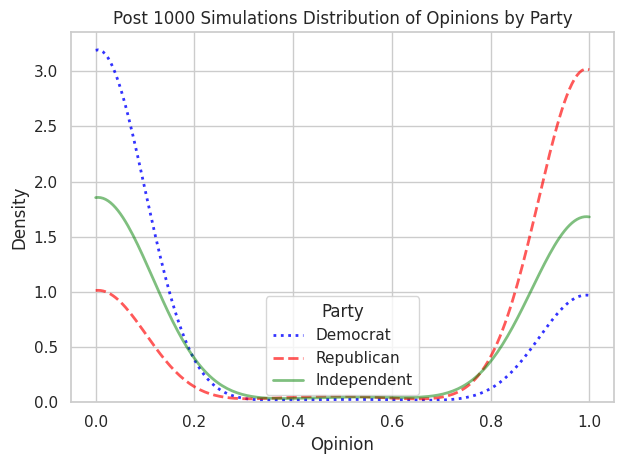

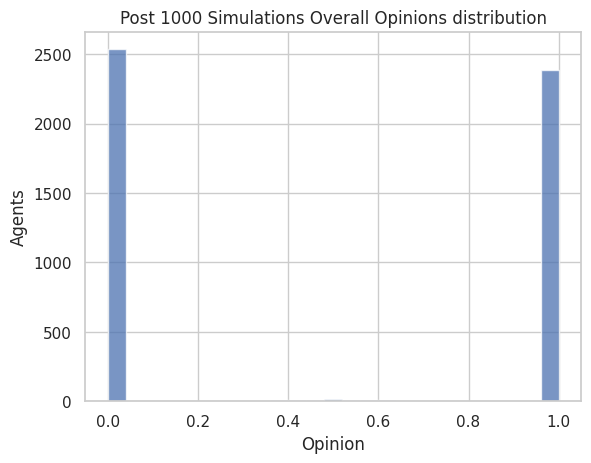

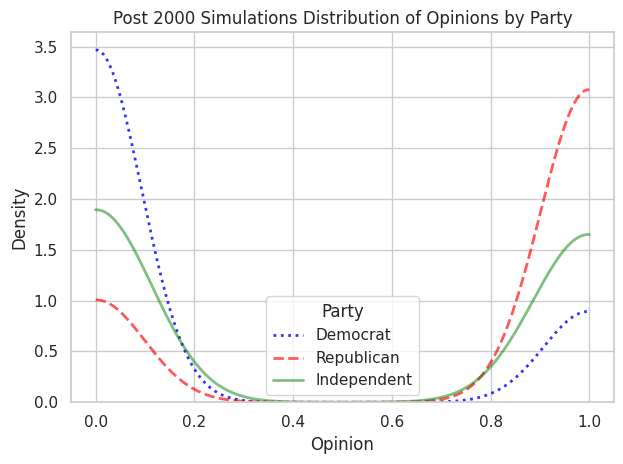

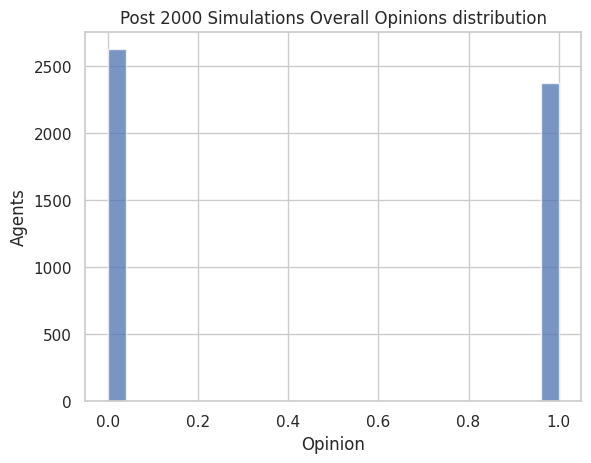

In [ ]:
i = 0
for post_interaction_sample in post_interaction_samples:
  democrat_final_positions = [j.position.item() for j in post_interaction_sample if j.party_id == 'd']
  republic_final_positions = [j.position.item() for j in post_interaction_sample if j.party_id == 'r']
  independant_final_positions = [j.position.item() for j in post_interaction_sample if j.party_id == 'i']
  final_positions = [j.position.item() for j in post_interaction_sample]


  # Plot KDEs for each political affiliation with lighter lines and restricted range
  sns.kdeplot(democrat_final_positions, color='blue', label='Democrat', linestyle=':', linewidth=2, alpha=0.8, clip=(0, 1))
  sns.kdeplot(republic_final_positions, color='red', label='Republican', linestyle='--', linewidth=2, alpha=0.65, clip=(0, 1))
  sns.kdeplot(independant_final_positions, color='green', label='Independent', linestyle='-', linewidth=2, alpha=0.5, clip=(0, 1))

  # Enhance plot readability and aesthetics
  plt.legend(title='Party')
  plt.xlabel('Opinion')
  plt.ylabel('Density')
  plt.title('Post {} Simulations Distribution of Opinions by Party'.format(sim_nums[i]))
  plt.tight_layout()  # Optimizes the layout
  plt.show()

  plt.hist(final_positions, bins=25, alpha=0.75)

  # Setting plot labels and title
  plt.xlabel('Opinion')
  plt.ylabel('Agents')
  plt.title('Post {} Simulations Overall Opinions distribution'.format(sim_nums[i]))

  # Display plot with grid
  plt.grid(True)
  plt.show()

  i = i+1



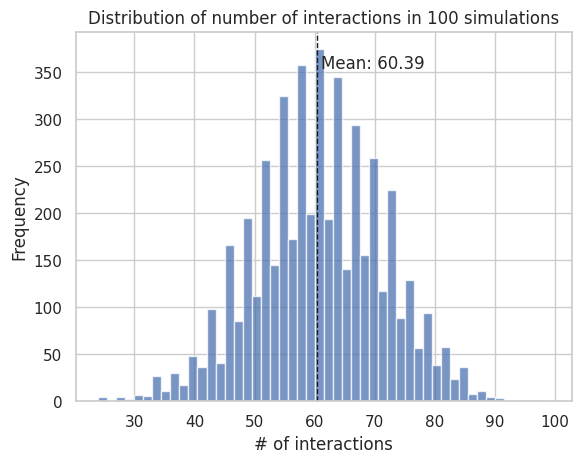

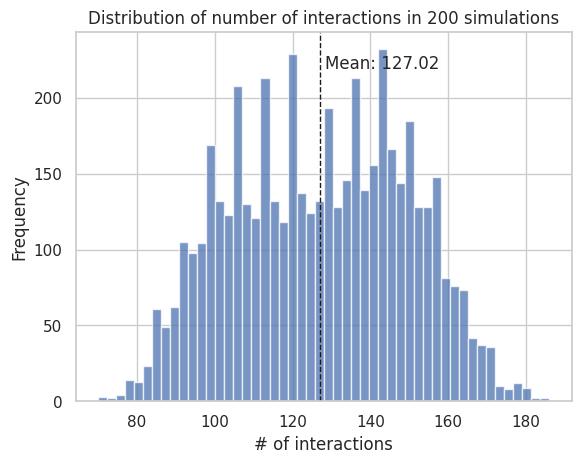

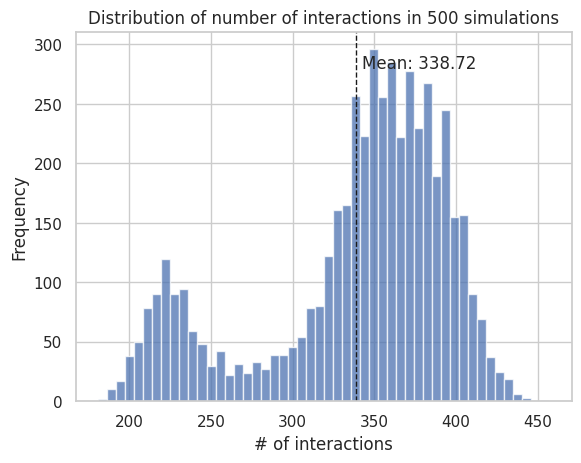

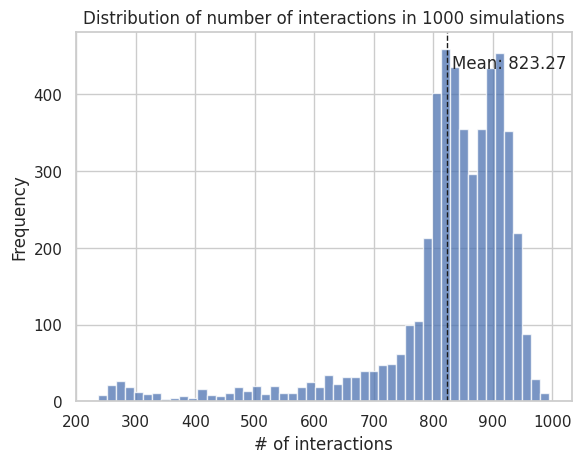

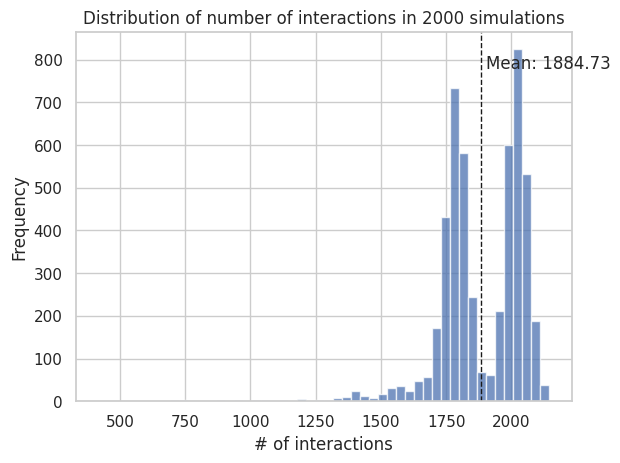

In [ ]:
i = 0
for post_interaction_sample in post_interaction_samples:
  counts = [j.counter for j in post_interaction_sample]

  # Calculate mean
  mean_count = np.mean(counts)

  # Create histogram
  plt.hist(counts, bins=50, alpha=0.75)

  # Setting plot labels and title
  plt.xlabel('# of interactions')
  plt.ylabel('Frequency')
  plt.title('Distribution of number of interactions in {} simulations'.format(sim_nums[i]))

  # Display mean
  plt.axvline(mean_count, color='k', linestyle='dashed', linewidth=1)
  plt.text(mean_count * 1.01, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(mean_count))

  # Display plot with grid
  plt.grid(True)
  plt.show()
  i += 1

In [ ]:
N = 5000
E = 0.1
T = 0.1
R = 0.25
Gini_coefficient = 0.434
intial_sample = full_inequality_sample
impact_multiplier = 1.2
prob_multiplier = 1.2

sim_nums = [100,200,500,1000]
E_list = [0.05,0.1,0.15,0.2,0.25,0.3] # exposure value

Gini_list = [0.2, 0.3, 0.4, 0.5, 0.6] # tolerance level in a population

R_list = [0.05,0.1,0.15,0.2,0.25,0.3]  # impact of the interaction

impact_multiplier_list = [0.8, 1, 1.2, 1.4, 1.6] # impact of increasing influence

prob_multiplier_list =  [0.8, 1, 1.2, 1.4, 1.6] #impact of increasing probability multiplier


sim_num = 500

Exposure_sensitivity_sample = []
Exposure_sensitivity_polarization = []
for e in E_list:

  print(e)

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, e, T, R, Gini_coefficient, full_inequality_sample, sim_num, impact_multiplier, prob_multiplier)
  Exposure_sensitivity_polarization.append(polarization)
  Exposure_sensitivity_sample.append(post_interaction_sample)


R_sensitivity_sample = []
R_sensitivity_polarization = []

for r in R_list:

  print(r)

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, r, Gini_coefficient, full_inequality_sample, sim_num, impact_multiplier, prob_multiplier)
  R_sensitivity_polarization.append(polarization)
  R_sensitivity_sample.append(post_interaction_sample)


Gini_sensitivity_sample = []
Gini_sensitivity_polarization = []

for g in Gini_list:

  print(g)

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, R, g, full_inequality_sample, sim_num, impact_multiplier, prob_multiplier)
  Gini_sensitivity_polarization.append(polarization)
  Gini_sensitivity_sample.append(post_interaction_sample)


impact_sensitivity_sample = []
impact_sensitivity_polarization = []

for i in impact_multiplier_list:

  print(i)

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, R, Gini_coefficient, full_inequality_sample, sim_num, i, prob_multiplier)
  impact_sensitivity_polarization.append(polarization)
  impact_sensitivity_sample.append(post_interaction_sample)



prob_sensitivity_sample = []
prob_sensitivity_polarization = []

for p in prob_multiplier_list:

  print(p)

  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

  post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, R, Gini_coefficient, full_inequality_sample, sim_num, impact_multiplier, p)
  prob_sensitivity_polarization.append(polarization)
  prob_sensitivity_sample.append(post_interaction_sample)




0.05
0.1
0.15
0.2
0.25
0.3
0.05
0.1
0.15
0.2
0.25
0.3
0.2
0.3
0.4
0.5
0.6
0.8
1
1.2
1.4
1.6
0.8
1
1.2
1.4
1.6


In [ ]:
N = 5000  # Total population

prop_elite_list = [0.0,.002,.004,.006,.008,.01,.02, .05, .1]

elite_sensitivity_sample = []
elite_sensitivity_polarization = []

for p in prop_elite_list:
 elite = int(N * p)  # 1% of population as elite

 prop_per_party = 0.331  # Proportion of each party in total population, based on ANES partisan survey

# Calculating the number of elites per party
 democratic_elite = int(elite * prop_per_party)
 republic_elite = democratic_elite
 ind_elite = elite - democratic_elite - republic_elite

# Calculating non-elite members per party
 democractic_non_elite = int((N - elite) * prop_per_party)
 republic_non_elite = democractic_non_elite
 independant_non_elite = int(N - elite - democractic_non_elite - republic_non_elite)

# Generating samples for non-elite members
 if p <= 0:
  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]



# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample

 else:
  democratic_non_elite_sample = [affective_voter('d', False,True) for i in range(democractic_non_elite)]
  republic_non_elite_sample = [affective_voter('r', False,True) for i in range(republic_non_elite)]
  independant_non_elite_sample = [affective_voter('i', False,False) for i in range(independant_non_elite)]

# Generating samples for elite members
  democratic_elite_sample = [affective_voter('d', True,True) for i in range(democratic_elite)]
  republic_elite_sample = [affective_voter('r', True,True) for i in range(republic_elite)]
  independant_elite_sample = [affective_voter('i', True,True) for i in range(ind_elite)]

# Combining all samples
  full_inequality_sample = democratic_non_elite_sample + republic_non_elite_sample + \
                         independant_non_elite_sample + democratic_elite_sample + \
                         republic_elite_sample + independant_elite_sample

 post_interaction_sample, polarization = run_simulation_elites_modified(N, E, T, R, Gini_coefficient, full_inequality_sample, 1000, impact_multiplier, prob_multiplier)
 elite_sensitivity_sample.append(post_interaction_sample)
 elite_sensitivity_polarization.append(polarization)



<Figure size 1000x600 with 0 Axes>

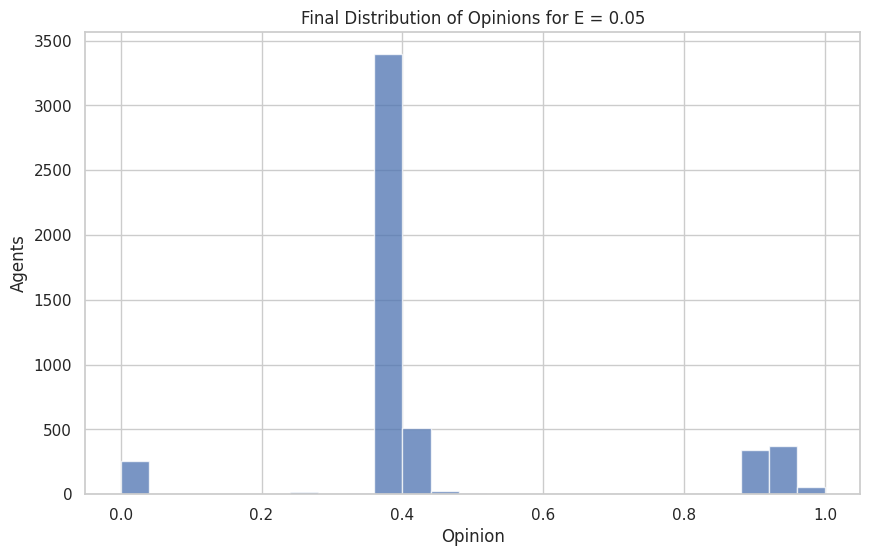

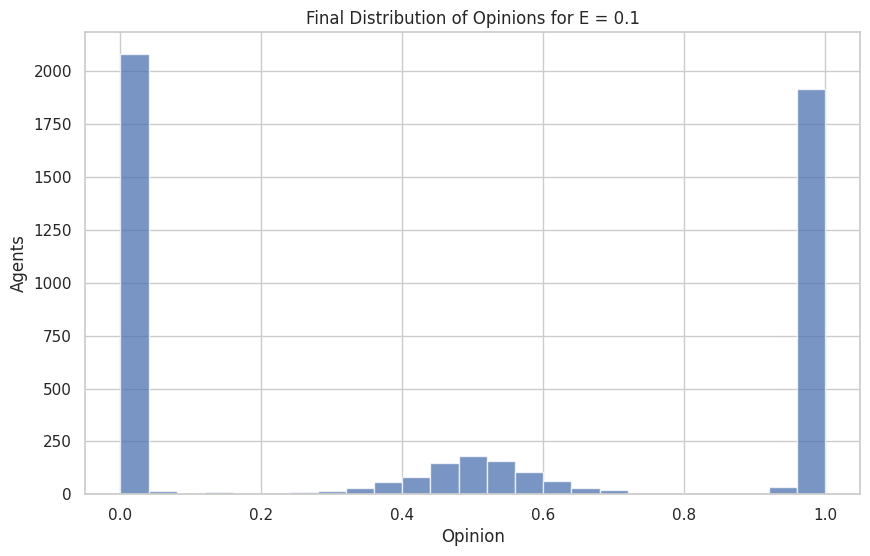

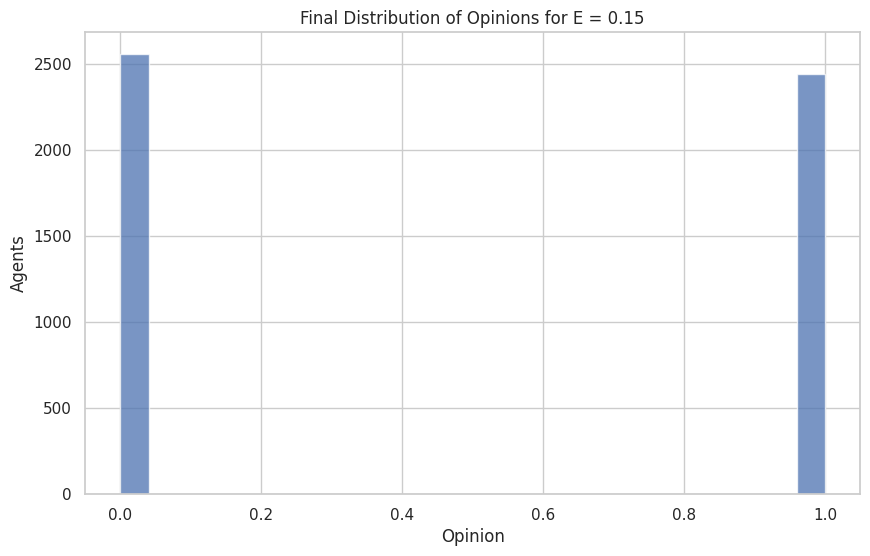

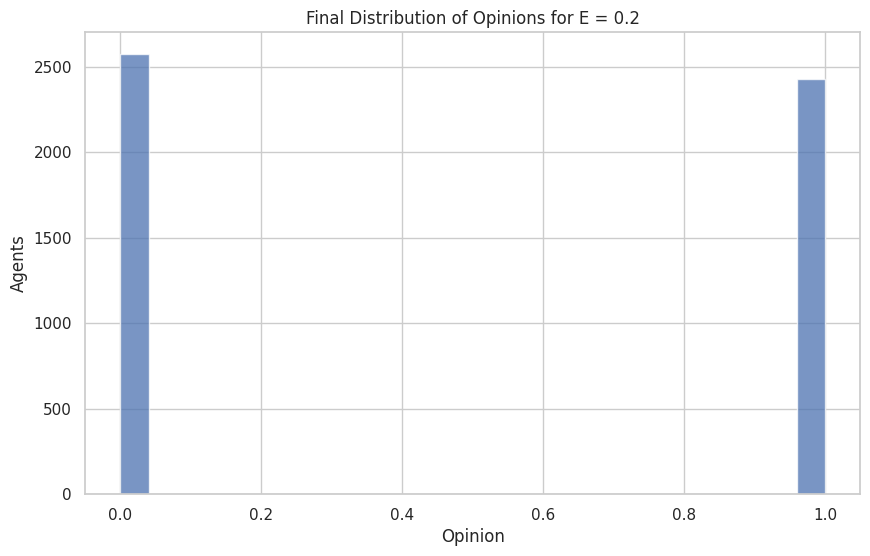

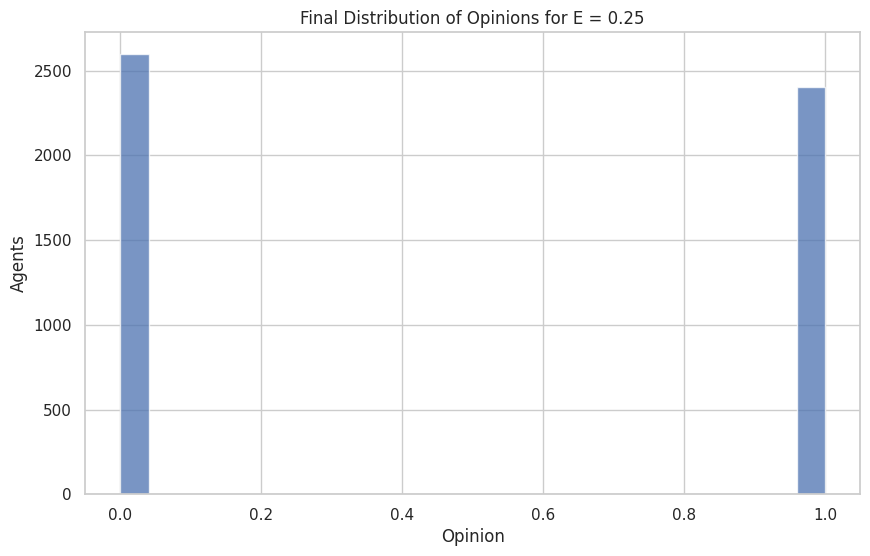

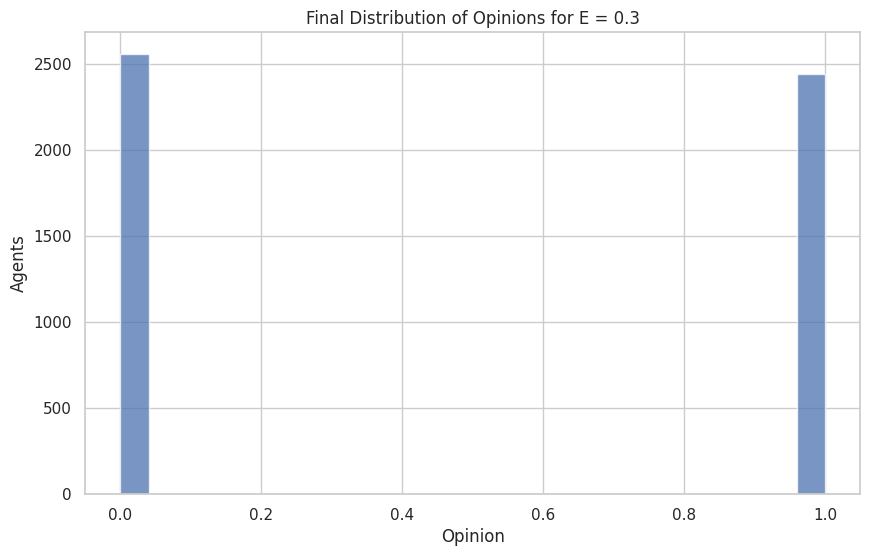

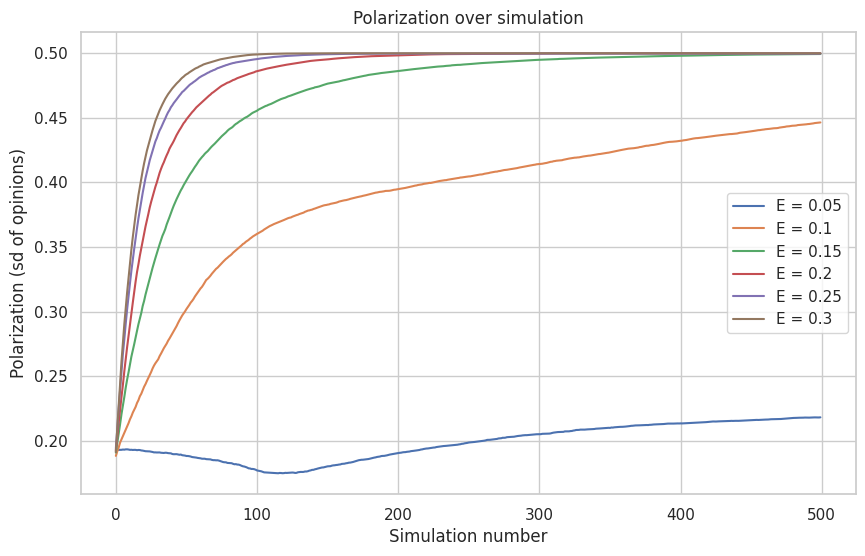

In [ ]:
sensitivity_plot(E_list,Exposure_sensitivity_sample,Exposure_sensitivity_polarization,"E")


<Figure size 1000x600 with 0 Axes>

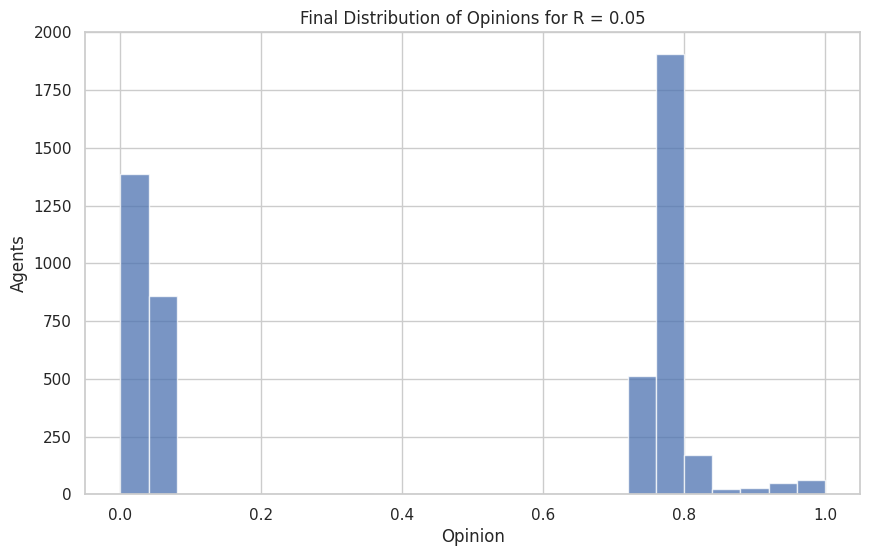

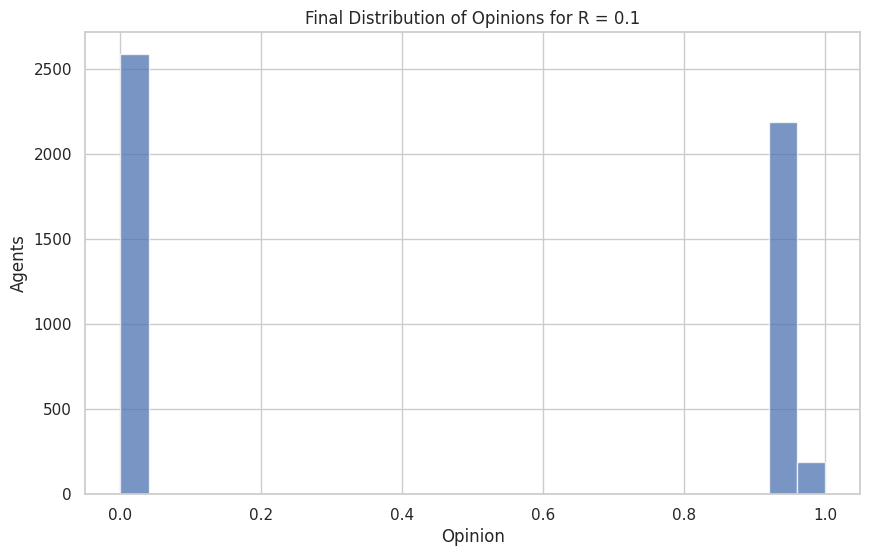

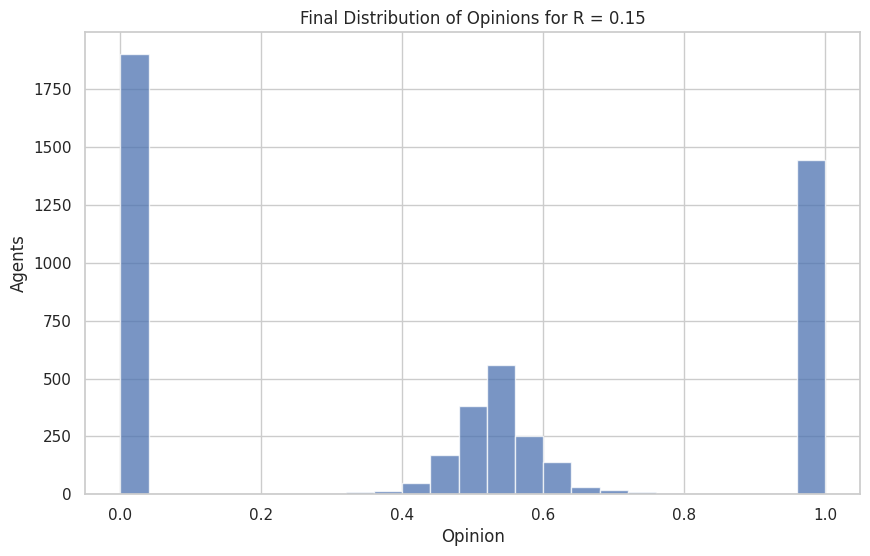

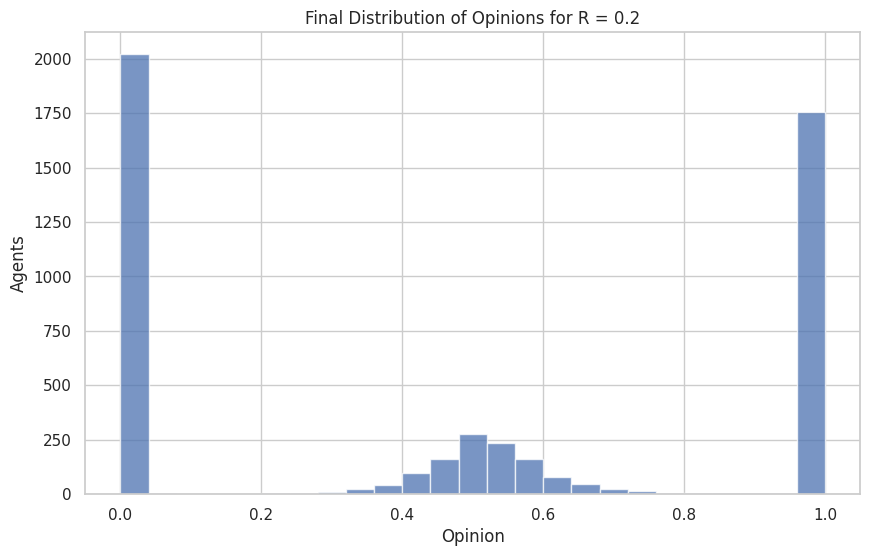

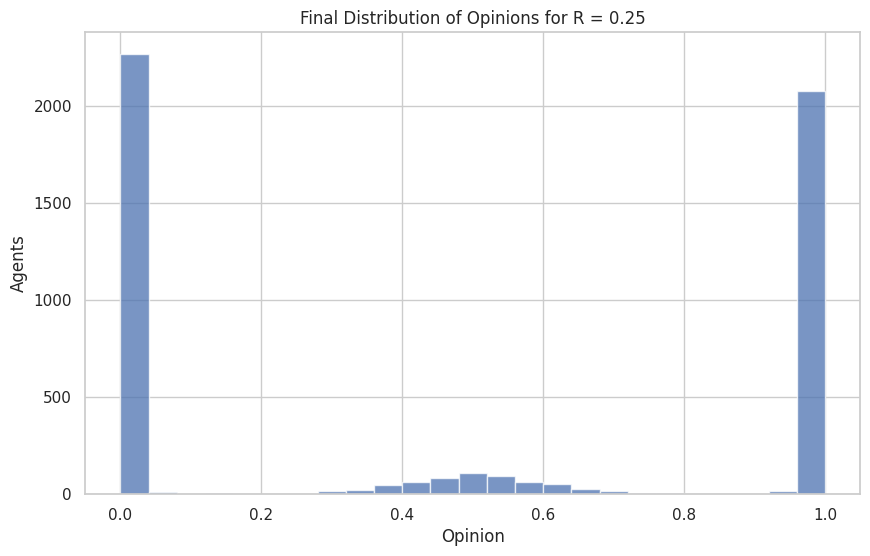

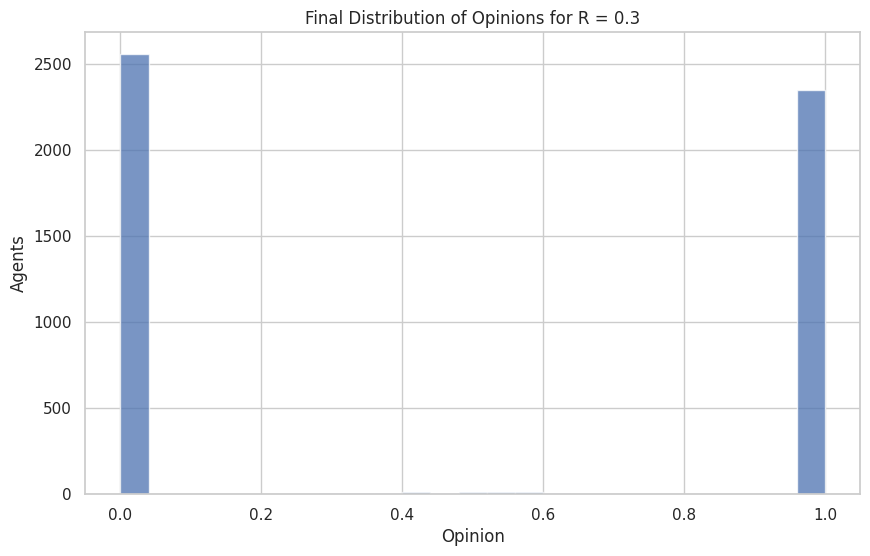

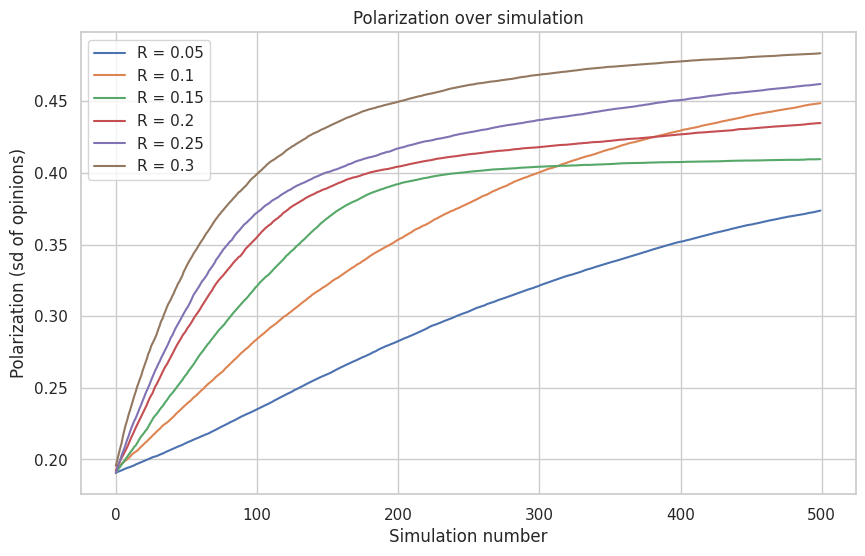

In [ ]:
sensitivity_plot(R_list,R_sensitivity_sample,R_sensitivity_polarization,"R")


<Figure size 1000x600 with 0 Axes>

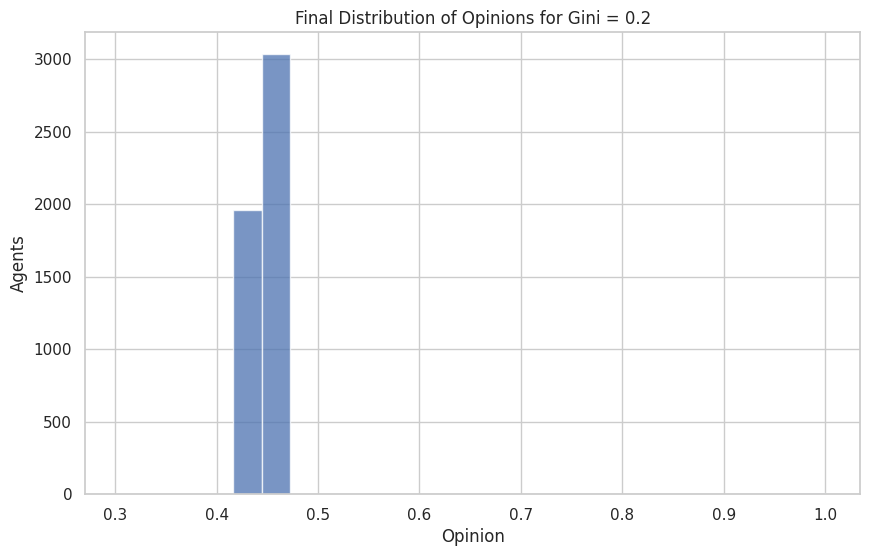

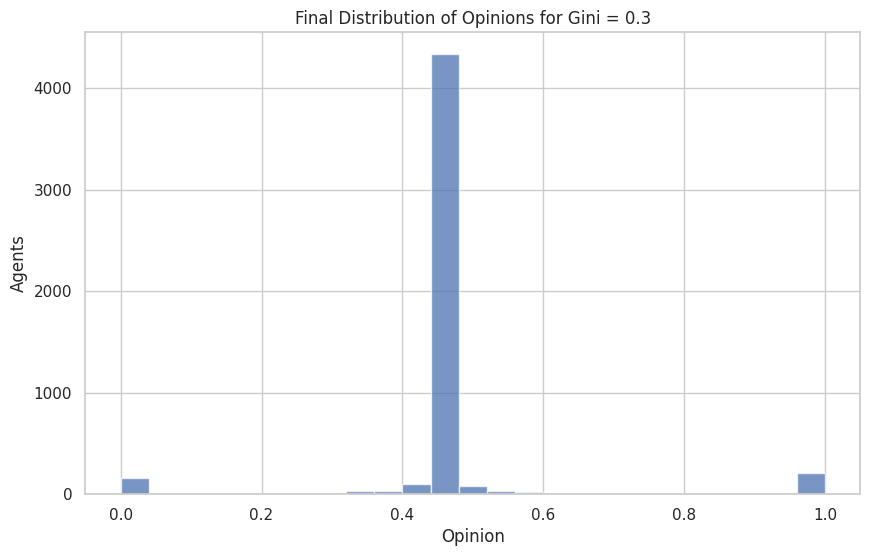

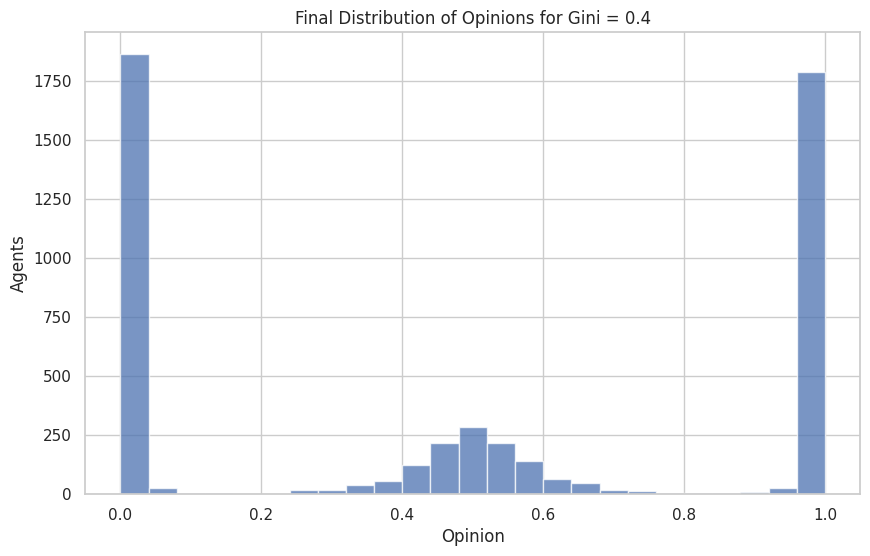

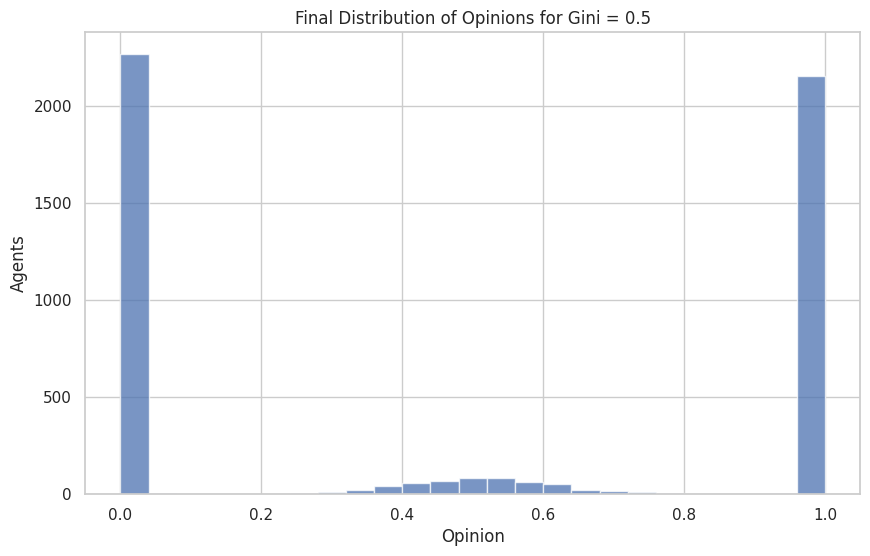

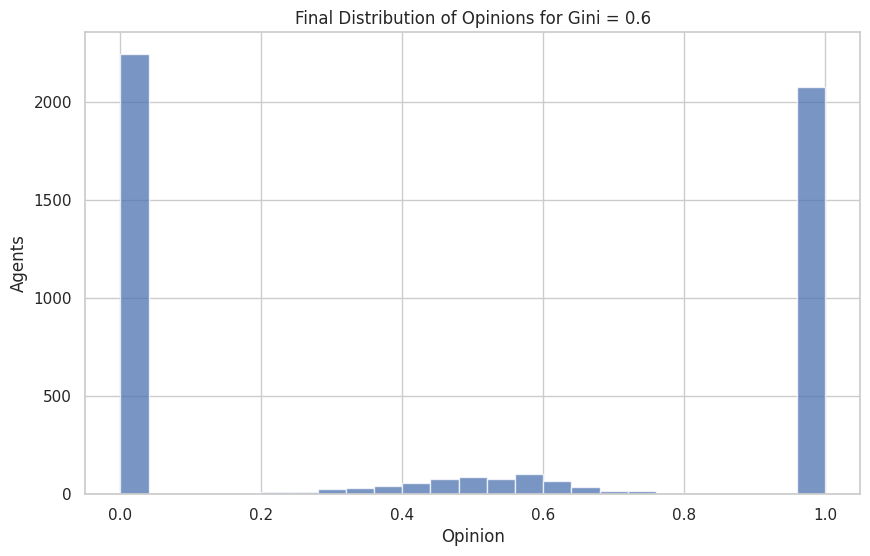

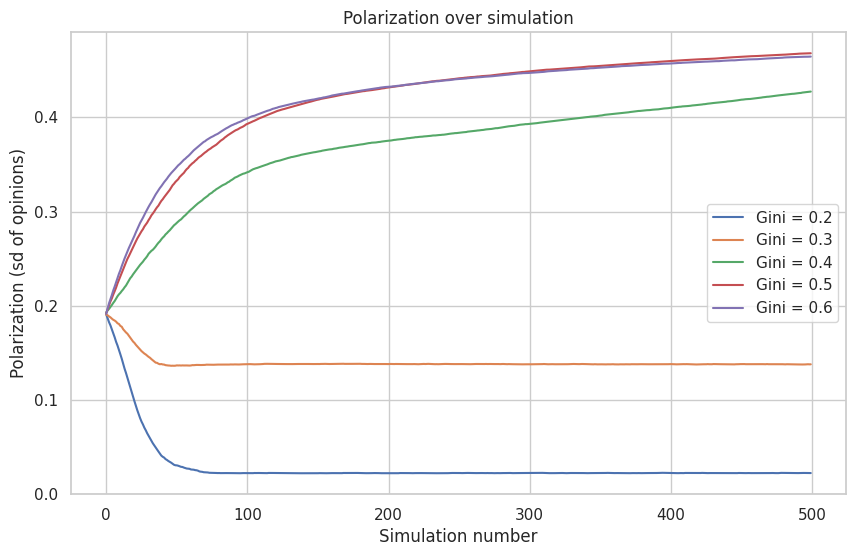

In [ ]:
sensitivity_plot(Gini_list,Gini_sensitivity_sample,Gini_sensitivity_polarization,"Gini")


<Figure size 1000x600 with 0 Axes>

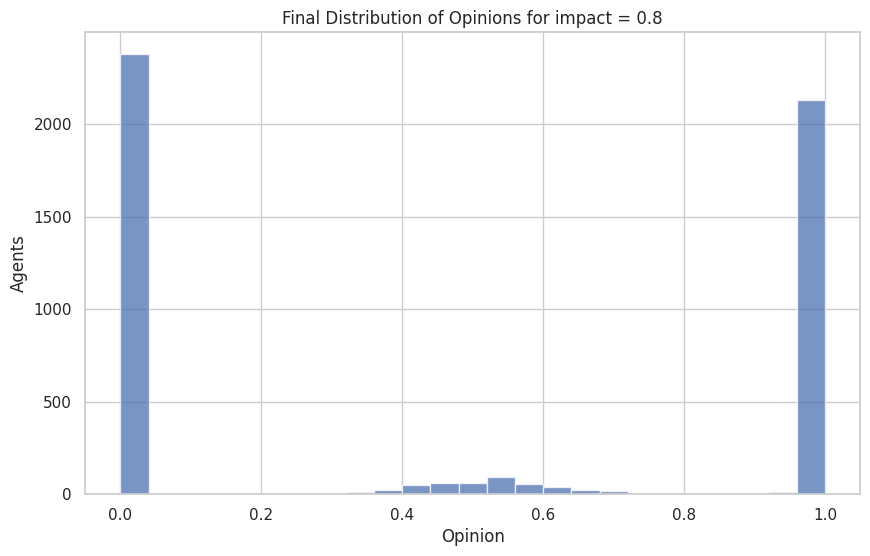

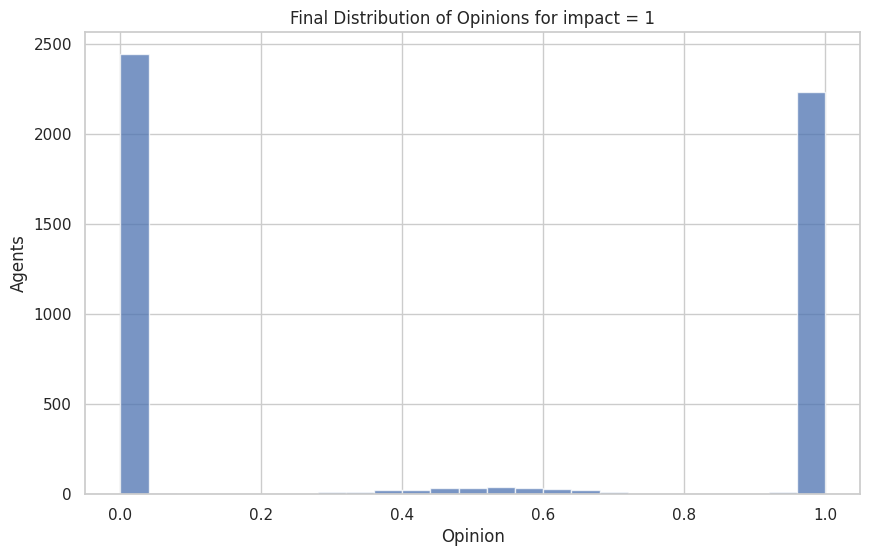

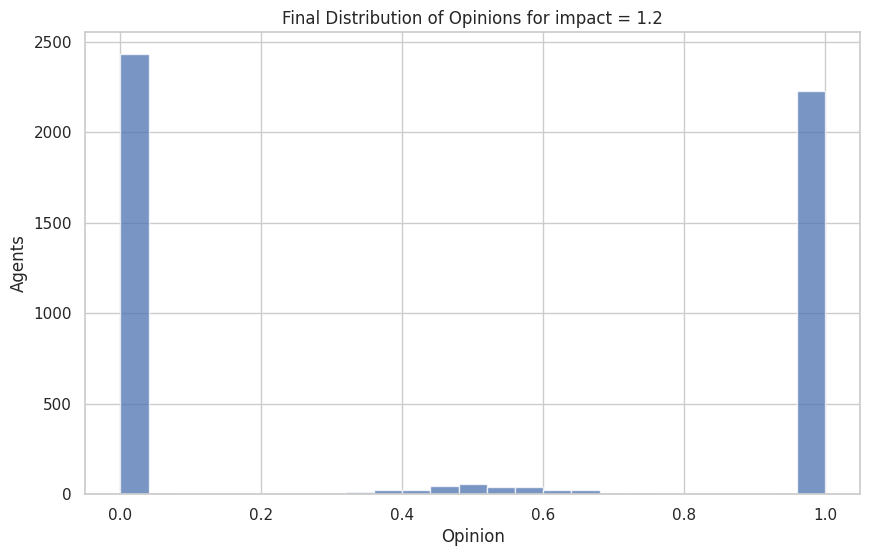

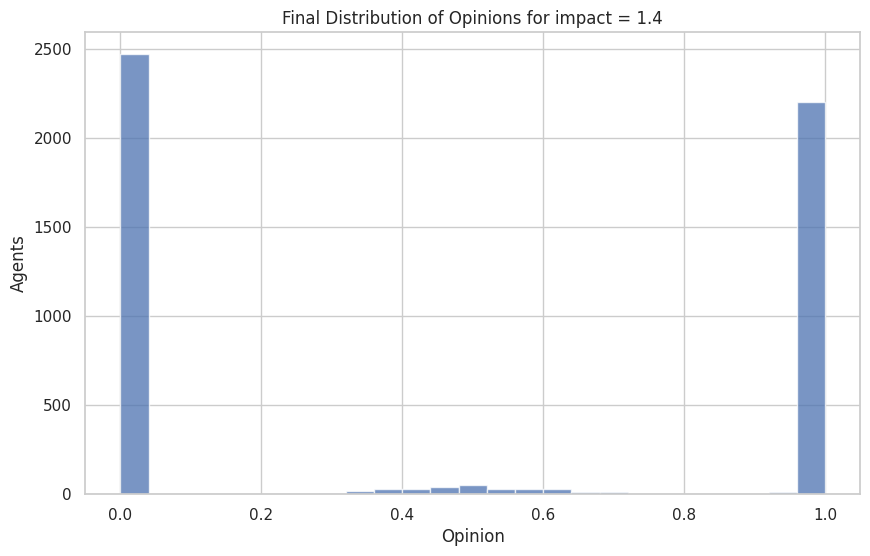

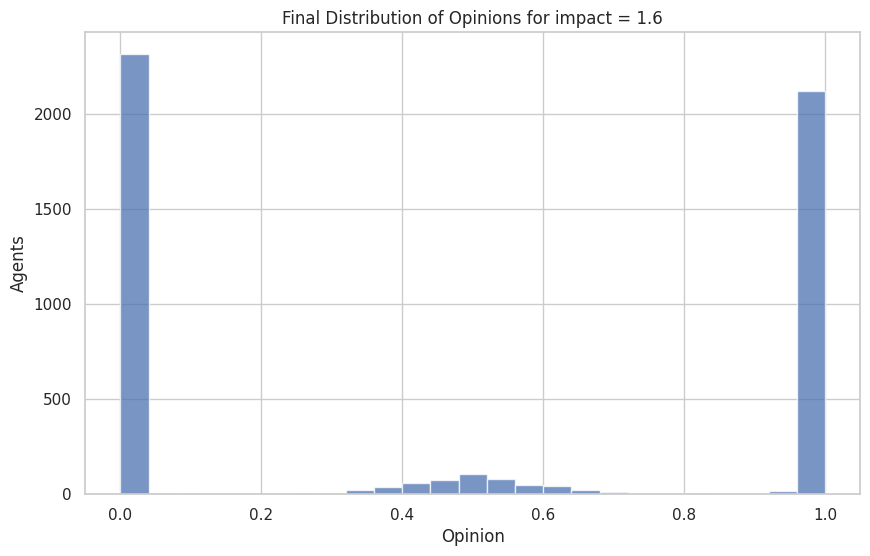

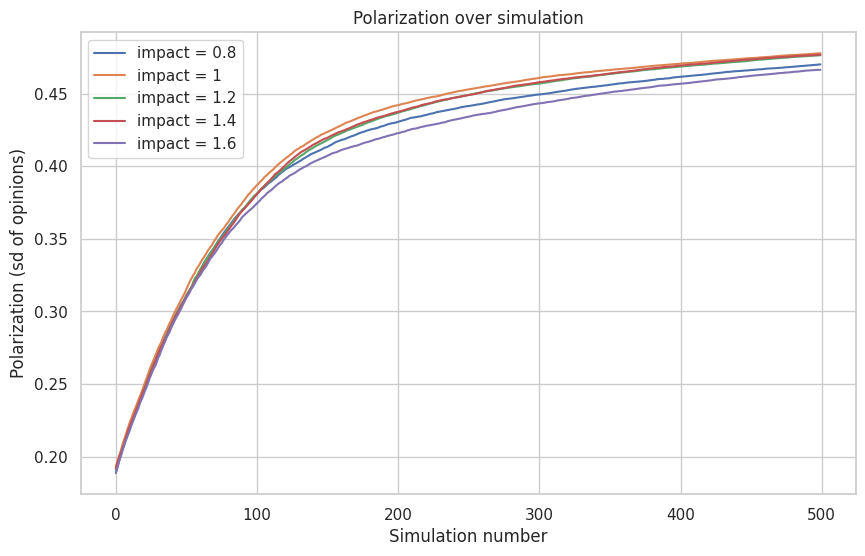

In [ ]:
sensitivity_plot(impact_multiplier_list,impact_sensitivity_sample,impact_sensitivity_polarization,"impact")


<Figure size 1000x600 with 0 Axes>

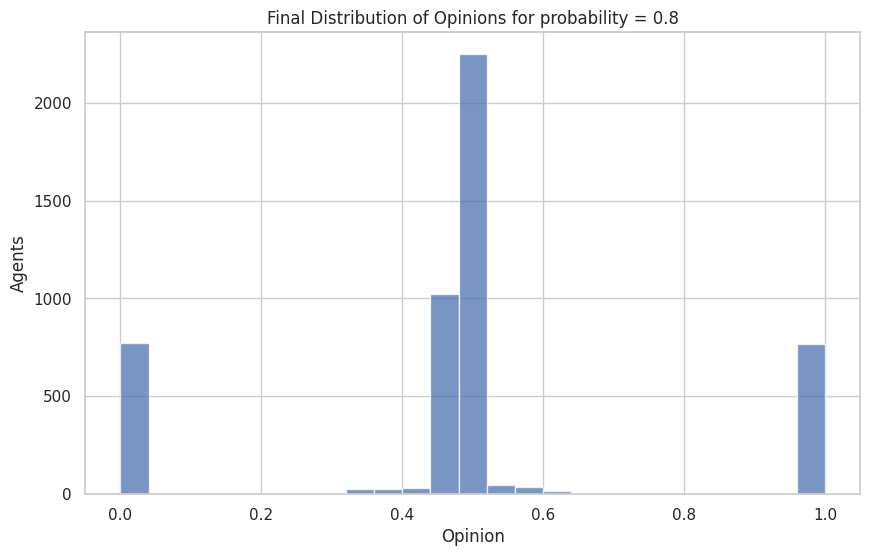

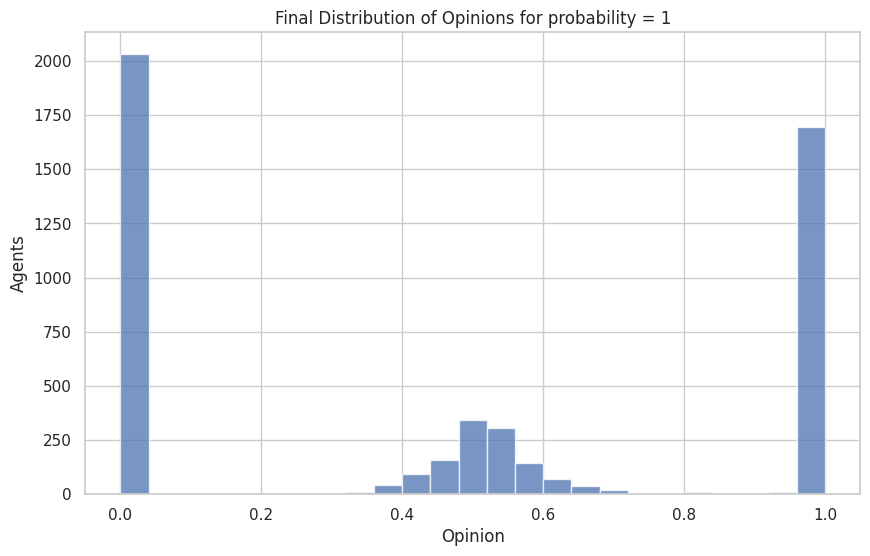

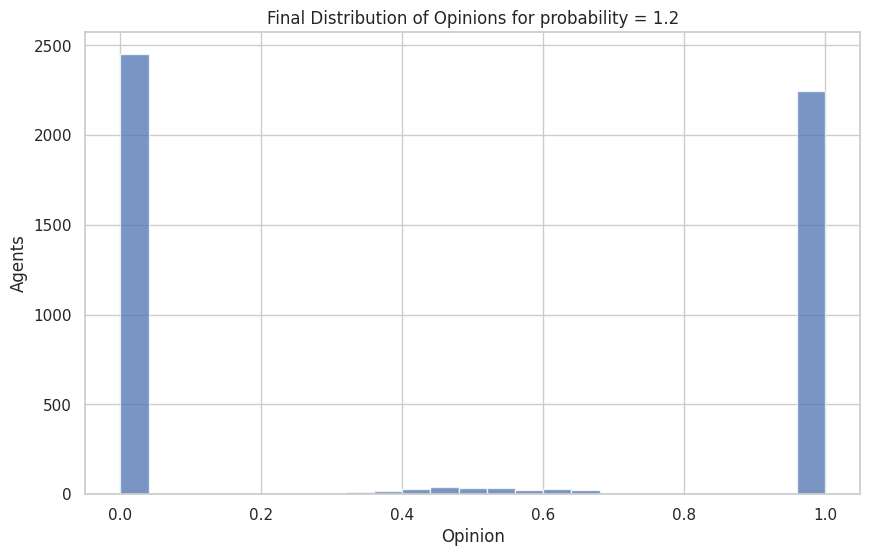

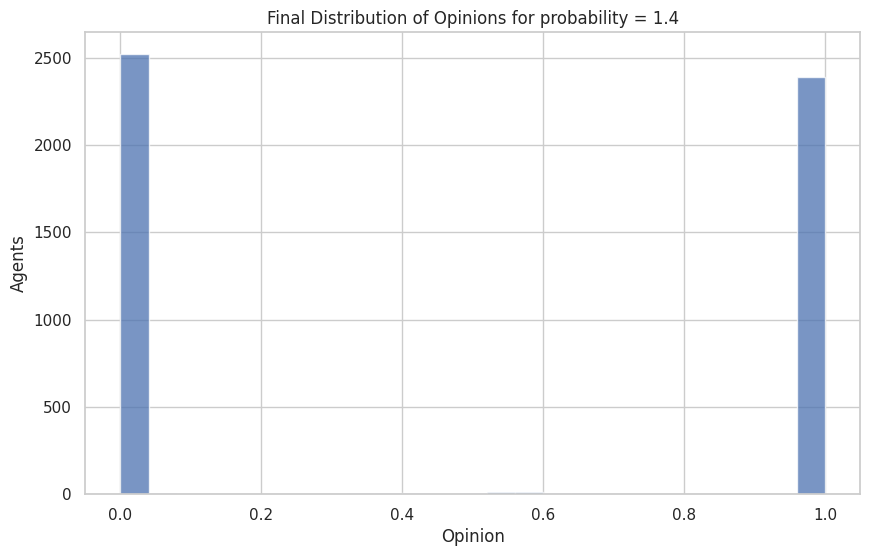

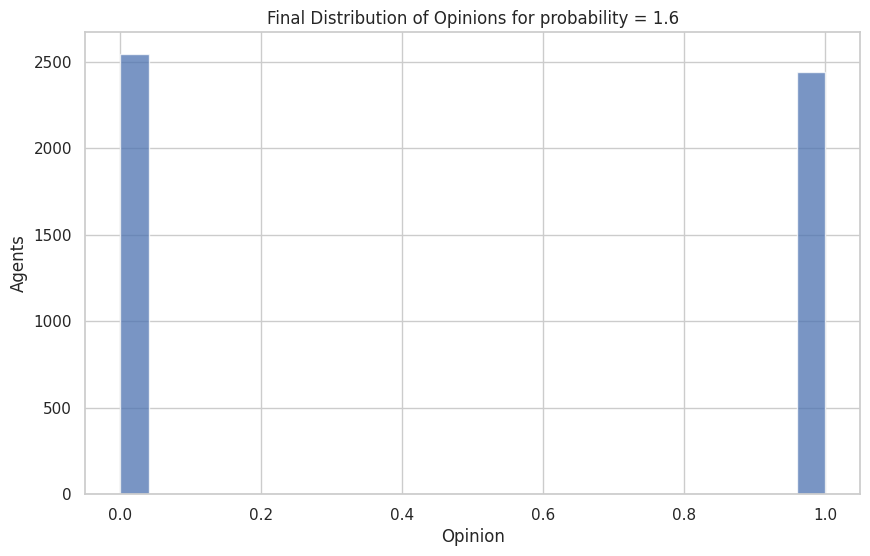

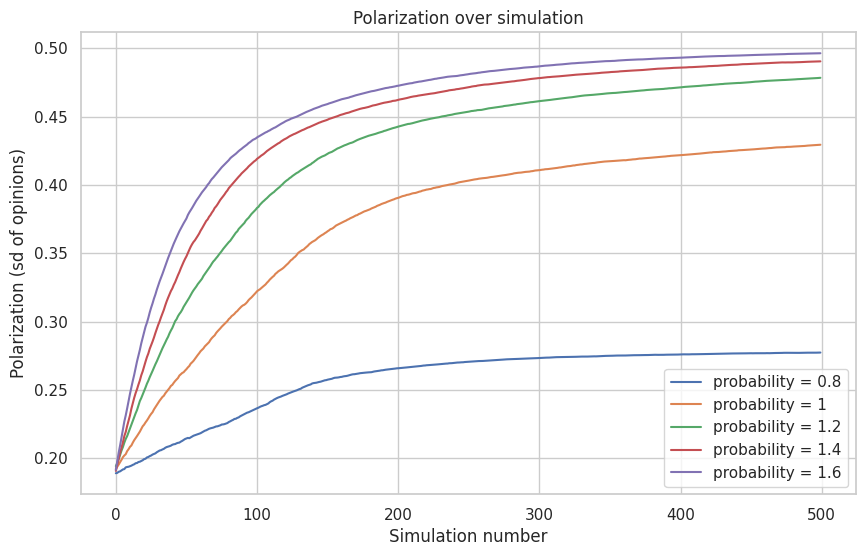

In [ ]:
sensitivity_plot(prob_multiplier_list,prob_sensitivity_sample,prob_sensitivity_polarization,"probability")


<Figure size 1000x600 with 0 Axes>

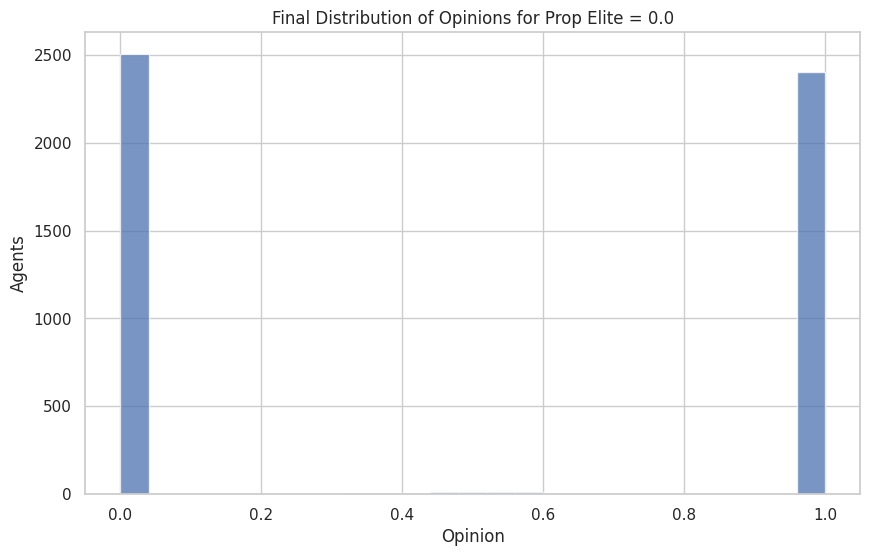

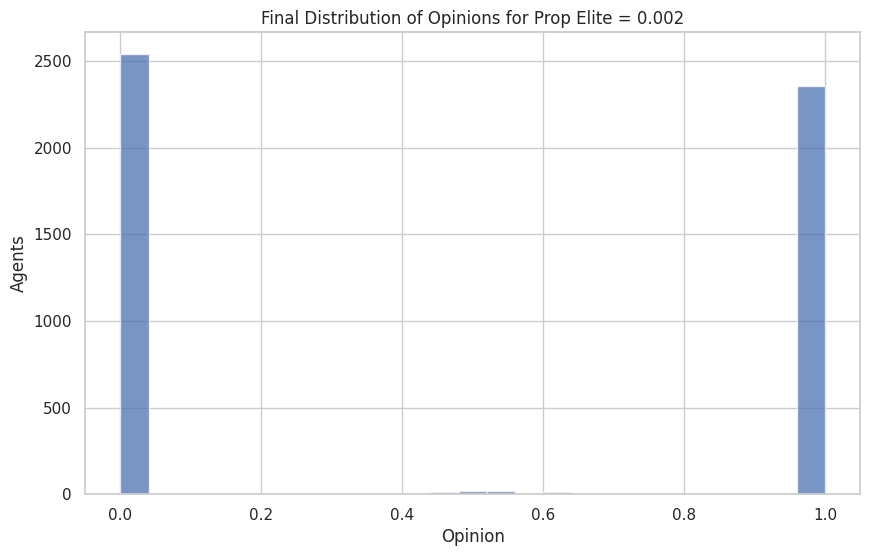

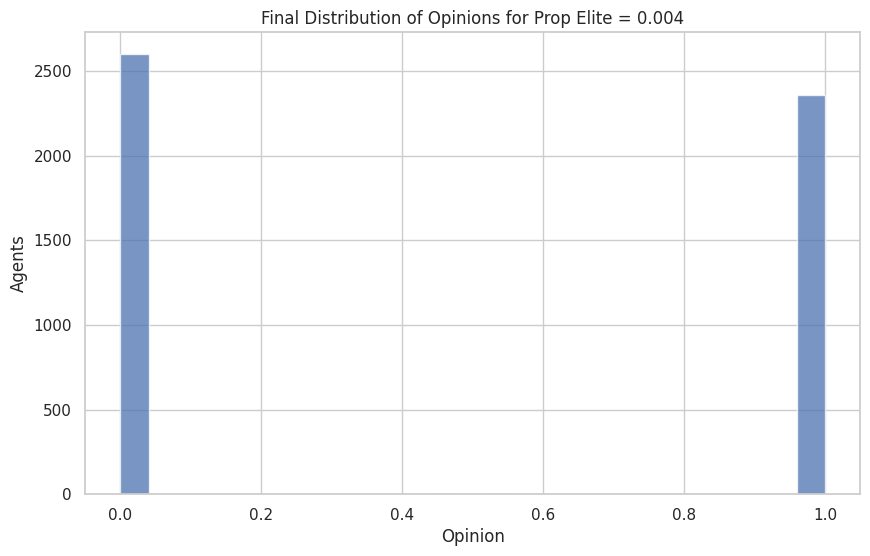

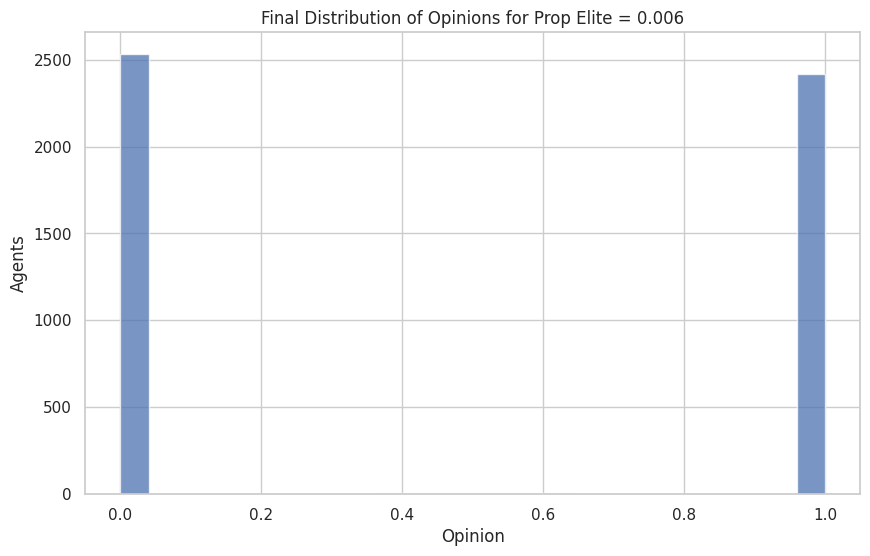

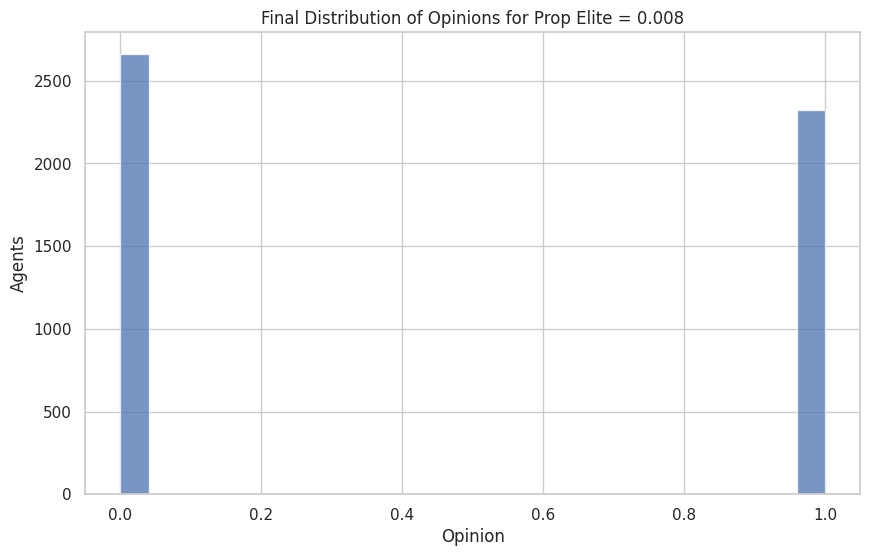

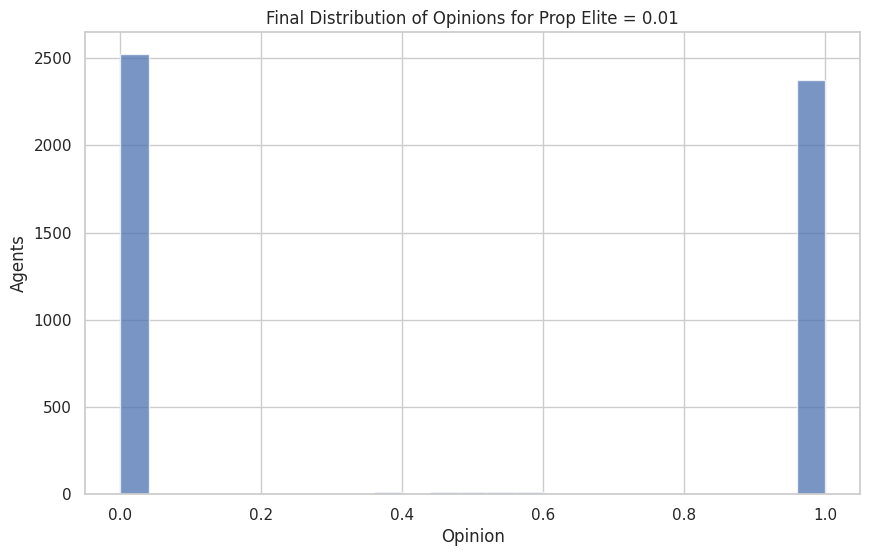

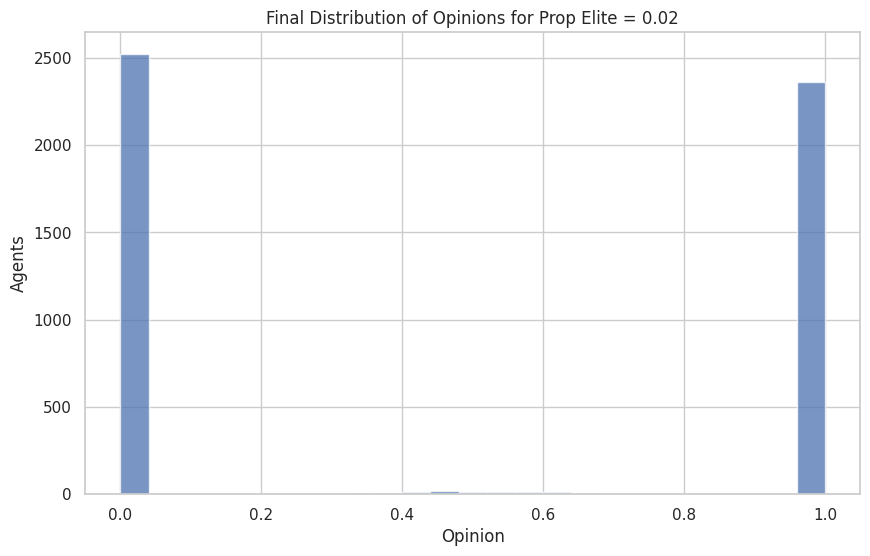

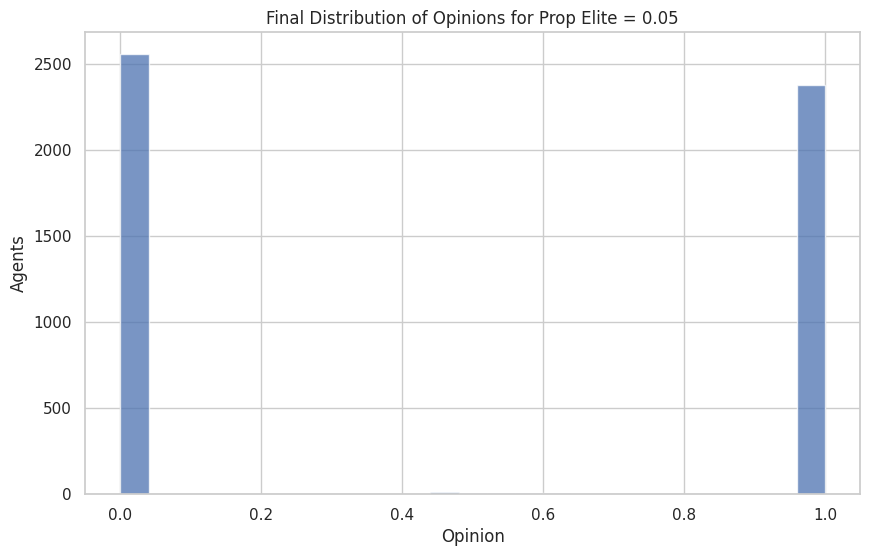

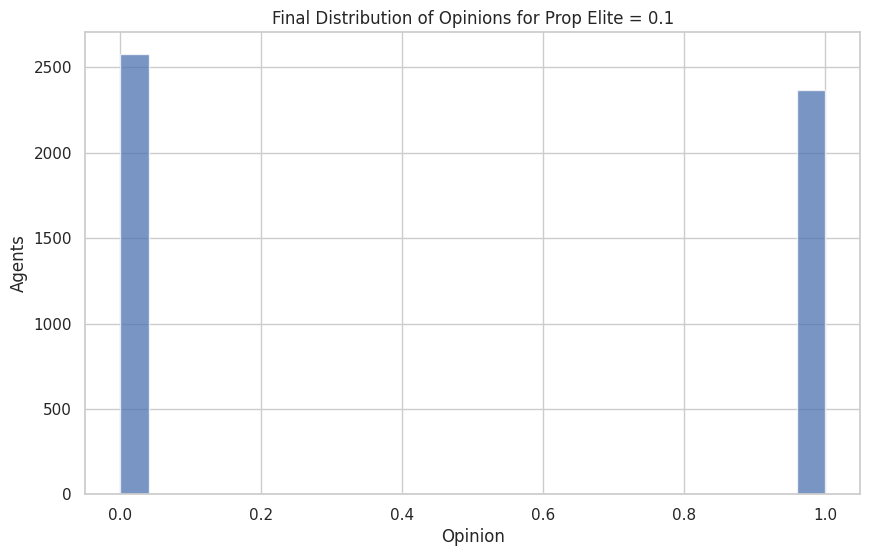

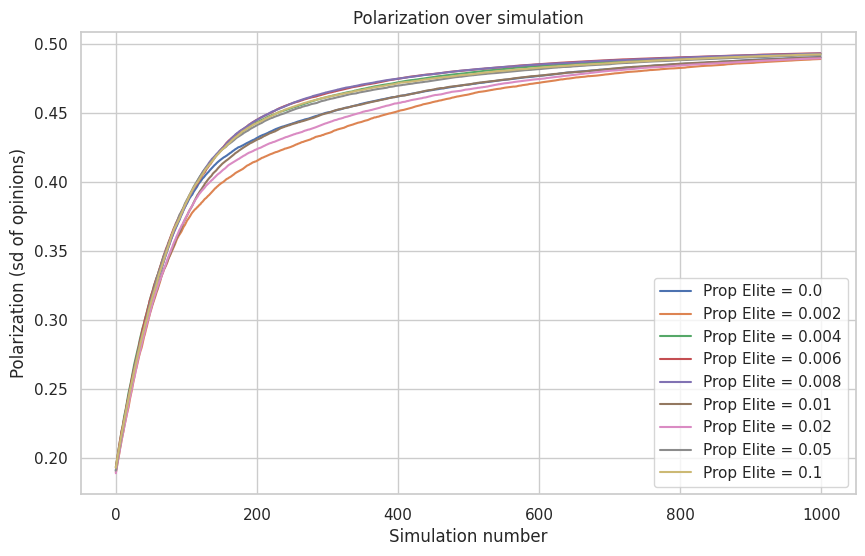

In [ ]:
sensitivity_plot(prop_elite_list,elite_sensitivity_sample,elite_sensitivity_polarization,"Prop Elite")

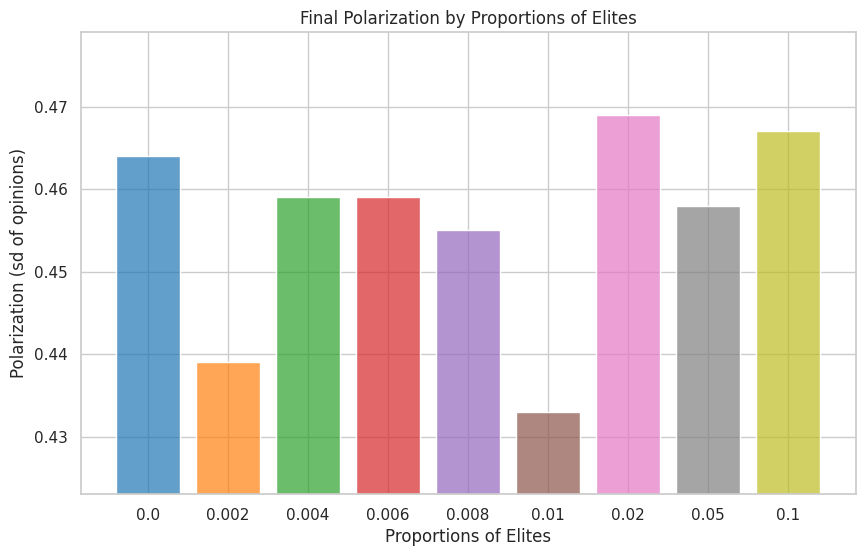

In [ ]:
import matplotlib.pyplot as plt

# Sample data from the image, replace with your actual data
elite_sensitivity_polarization = [0.464, 0.439, 0.459, 0.459, 0.455, 0.433, 0.469, 0.458, 0.467]
prop_elite_list = ['0.0', '0.002', '0.004', '0.006', '0.008', '0.01', '0.02', '0.05', '0.1']

# Adjusted colors with alpha for less brightness
colors = [
    '#1f77b4', # blue
    '#ff7f0e', # orange
    '#2ca02c', # green
    '#d62728', # red
    '#9467bd', # purple
    '#8c564b', # brown
    '#e377c2', # pink
    '#7f7f7f', # gray
    '#bcbd22', # yellow-green
]
colors_alpha = [color + 'B3' for color in colors]  # Appending 'B3' to set alpha to ~70%

# Create the bar chart using indices for equidistant bars
x_pos = range(len(prop_elite_list))

plt.figure(figsize=(10, 6))
plt.bar(x_pos, elite_sensitivity_polarization, color=colors_alpha)

# Adjusting the y-axis to not start from zero and zoom in a little bit
plt.ylim(min(elite_sensitivity_polarization) - 0.01, max(elite_sensitivity_polarization) + 0.01)

# Labeling the axes with the actual proportions
plt.xticks(x_pos, prop_elite_list)  # Set text labels.
plt.xlabel('Proportions of Elites')
plt.ylabel('Polarization (sd of opinions)')
plt.title('Final Polarization by Proportions of Elites')

plt.show()


In [ ]:
for i in range(len(prop_elite_list)):
    print(elite_sensitivity_polarization[i][-1])

TypeError: 'float' object is not subscriptable